## Importing Library's

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import _pickle as pickle
import bz2
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
path='C:/Users/KIIT/Downloads/Multilingual Dataset for Language Identification/Multilingual Dataset/'
dataset={}
languages=['arabic','assamese','bengali','bulgarian','czech','dutch','english','french','german','greek','hebrew','hindi','indonasian','italian','japanese','korean','malayalam','mandarin_chinese','oriya','polish','portuguese','russian','serbian','spanish','swedish','tamil','telugu','thai','urdu','vietnamese']
for index,lang in enumerate(languages):
    dataset[lang+'_df']=pd.read_csv(path+lang+'.txt',encoding ='utf-8',usecols=[0],header=None,names=[lang.capitalize()],sep="\t")
    print("Language",index+1,"("+lang.capitalize()+")\n----------------------------------------------------------------------------")
    print(dataset[lang+'_df'].head(2).to_csv(index=False,header=False))

Language 1 (Arabic)
----------------------------------------------------------------------------
مرحبًا.
اركض!

Language 2 (Assamese)
----------------------------------------------------------------------------
কি কৰি আছা?
মই চিগাৰেট খাব পাৰোঁ নে?

Language 3 (Bengali)
----------------------------------------------------------------------------
আমি বুঝতে পারলাম না।
আমি একজন ছাত্র।

Language 4 (Bulgarian)
----------------------------------------------------------------------------
"Той се е оправил, затова скоро ще може да излезе от болницата."
По-умен съм от теб.

Language 5 (Czech)
----------------------------------------------------------------------------
Ucím se dva cizí jazyky.
"John požádal Toma, aby Mary položil otázku, na což zapomnel."

Language 6 (Dutch)
----------------------------------------------------------------------------
De machine is buiten bedrijf.
"Ik was dicht bij de rivier, toen ik de weg kwijt raakte."

Language 7 (English)
-------------------------------------

## Data Pre-Processing

In [3]:
def cleandata(dataset):
    table={33:'',34:'',35:'',36:'',37:'',38:'',39:'',40:'',41:'',42:'',43:'',44:'',45:'',46:'',47:'',58:'',59:'',60:'',61:'',62:'',63:'',64:'',91:'',92:'',93:'',94:'',95:'',96:'',123:'',124:'',125:'',126:'',48:'',49:'',50:'',51:'',52:'',53:'',54:'',55:'',56:'',57:''}
    text,lang=[],[]
    for i in dataset:
        for index,sentence in dataset[i].iterrows():
            sentence=sentence[0]
            if len(sentence)>0:
                sentence=sentence.lower()
                sentence=sentence.translate(table)
                sentence=sentence.strip()
                text.append(sentence)
                lang.append(i[:len(i)-3])
    return (pd.DataFrame({"Sentence":text,"Language":lang}))
dataset=cleandata(dataset)
print(dataset.shape)

(505027, 2)


## Dataset Visualization

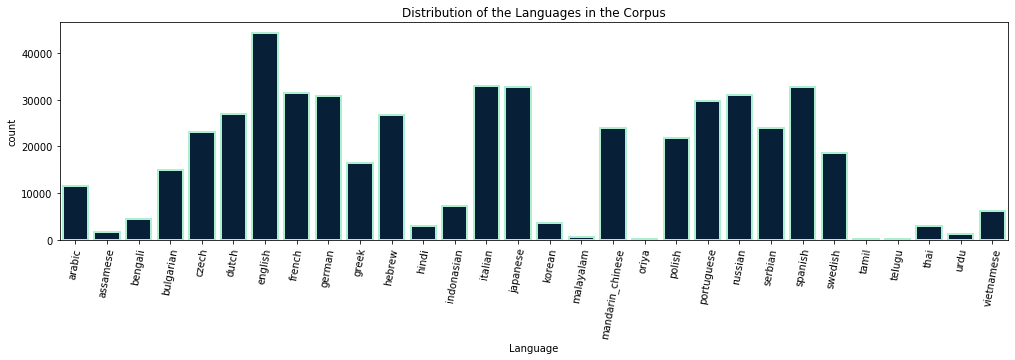

In [4]:
plt.figure(figsize=(17,4))
sb.countplot(dataset.iloc[:,1],data=dataset,edgecolor="#ADEFD1",color="#00203F",linewidth=2)
plt.title("Distribution of the Languages in the Corpus")
plt.xticks(rotation=80)
plt.show()

## Train Set & Test Set Split

In [5]:
X, Y=dataset.iloc[:,0],dataset.iloc[:,1]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.75,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(126256,) (126256,)
(378771,) (378771,)


## Vectorizer and Model Fitting Pipeline

In [6]:
# Vectorizer and Model fitting Pipeline
def vectorizer(n=(1,2),a='char'):
    return TfidfVectorizer(ngram_range=n,analyzer=a)
lr_1g_char=Pipeline([('vectorizer',vectorizer((1,1),'char')),('classification',LogisticRegression(n_jobs=-1))])
lr_1g_word=Pipeline([('vectorizer',vectorizer((1,1),'word')),('classification',LogisticRegression(n_jobs=-1))])
lr_2g_char=Pipeline([('vectorizer',vectorizer((1,2),'char')),('classification',LogisticRegression(n_jobs=-1))])
lr_2g_word=Pipeline([('vectorizer',vectorizer((1,2),'word')),('classification',LogisticRegression(n_jobs=-1))])
lr_3g_char=Pipeline([('vectorizer',vectorizer((1,3),'char')),('classification',LogisticRegression(n_jobs=-1))])
lr_4g_char=Pipeline([('vectorizer',vectorizer((1,4),'char')),('classification',LogisticRegression(n_jobs=-1))])
# Model Fitting
lr_1g_char.fit(X_train,Y_train)
lr_1g_word.fit(X_train,Y_train)
lr_2g_char.fit(X_train,Y_train)
lr_2g_word.fit(X_train,Y_train)
lr_3g_char.fit(X_train,Y_train)
lr_4g_char.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 4), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classification',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, i

## Model Acuracy

In [7]:
# Model Prediction
Y_predictedc1=lr_1g_char.predict(X_test)
Y_predictedw1=lr_1g_word.predict(X_test)
Y_predictedc2=lr_2g_char.predict(X_test)
Y_predictedw2=lr_2g_word.predict(X_test)
Y_predictedc3=lr_3g_char.predict(X_test)
Y_predictedc4=lr_4g_char.predict(X_test)
# Model Evaluation
a1gc=metrics.accuracy_score(Y_test,Y_predictedc1)*100
print("Accuracy 1gram char:",round(a1gc,3),'%')
a1gw=metrics.accuracy_score(Y_test,Y_predictedw1)*100
print("Accuracy 1gram word:",round(a1gw,3),'%')
a2gc=metrics.accuracy_score(Y_test,Y_predictedc2)*100
print("Accuracy 2gram char:",round(a2gc,3),'%')
a2gw=metrics.accuracy_score(Y_test,Y_predictedw2)*100
print("Accuracy 2gram word:",round(a2gw,3),'%')
a3gc=metrics.accuracy_score(Y_test,Y_predictedc3)*100
print("Accuracy 3gram char:",round(a3gc,3),'%')
a4gc=metrics.accuracy_score(Y_test,Y_predictedc4)*100
print("Accuracy 4gram char:",round(a4gc,3),'%')

Accuracy 1gram char: 86.228 %
Accuracy 1gram word: 88.391 %
Accuracy 2gram char: 97.523 %
Accuracy 2gram word: 87.963 %
Accuracy 3gram char: 98.785 %
Accuracy 4gram char: 99.024 %


## Comparison Between Models

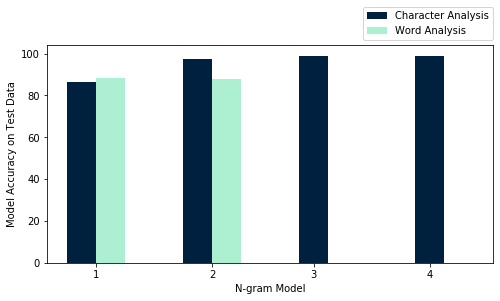

In [8]:
accuracyc,accuracyw=[a1gc,a2gc,a3gc,a4gc],[a1gw,a2gw,0,0]
index=np.arange(4)
axes= plt.subplots(figsize=(8,4))[1]
plt.bar(index,accuracyc,width=0.25,color='#00203F')
plt.bar(index+width,accuracyw,width=0.25,color='#ADEFD1')
axes.set_xticks([0.125,1.125,2,3])
axes.set_xticklabels(['1','2','3','4'])
plt.legend(['Character Analysis', 'Word Analysis'], bbox_to_anchor=(1.01,1.20))
plt.xlabel("N-gram Model")
plt.ylabel("Model Accuracy on Test Data")
plt.show()

## Confusion Matrix

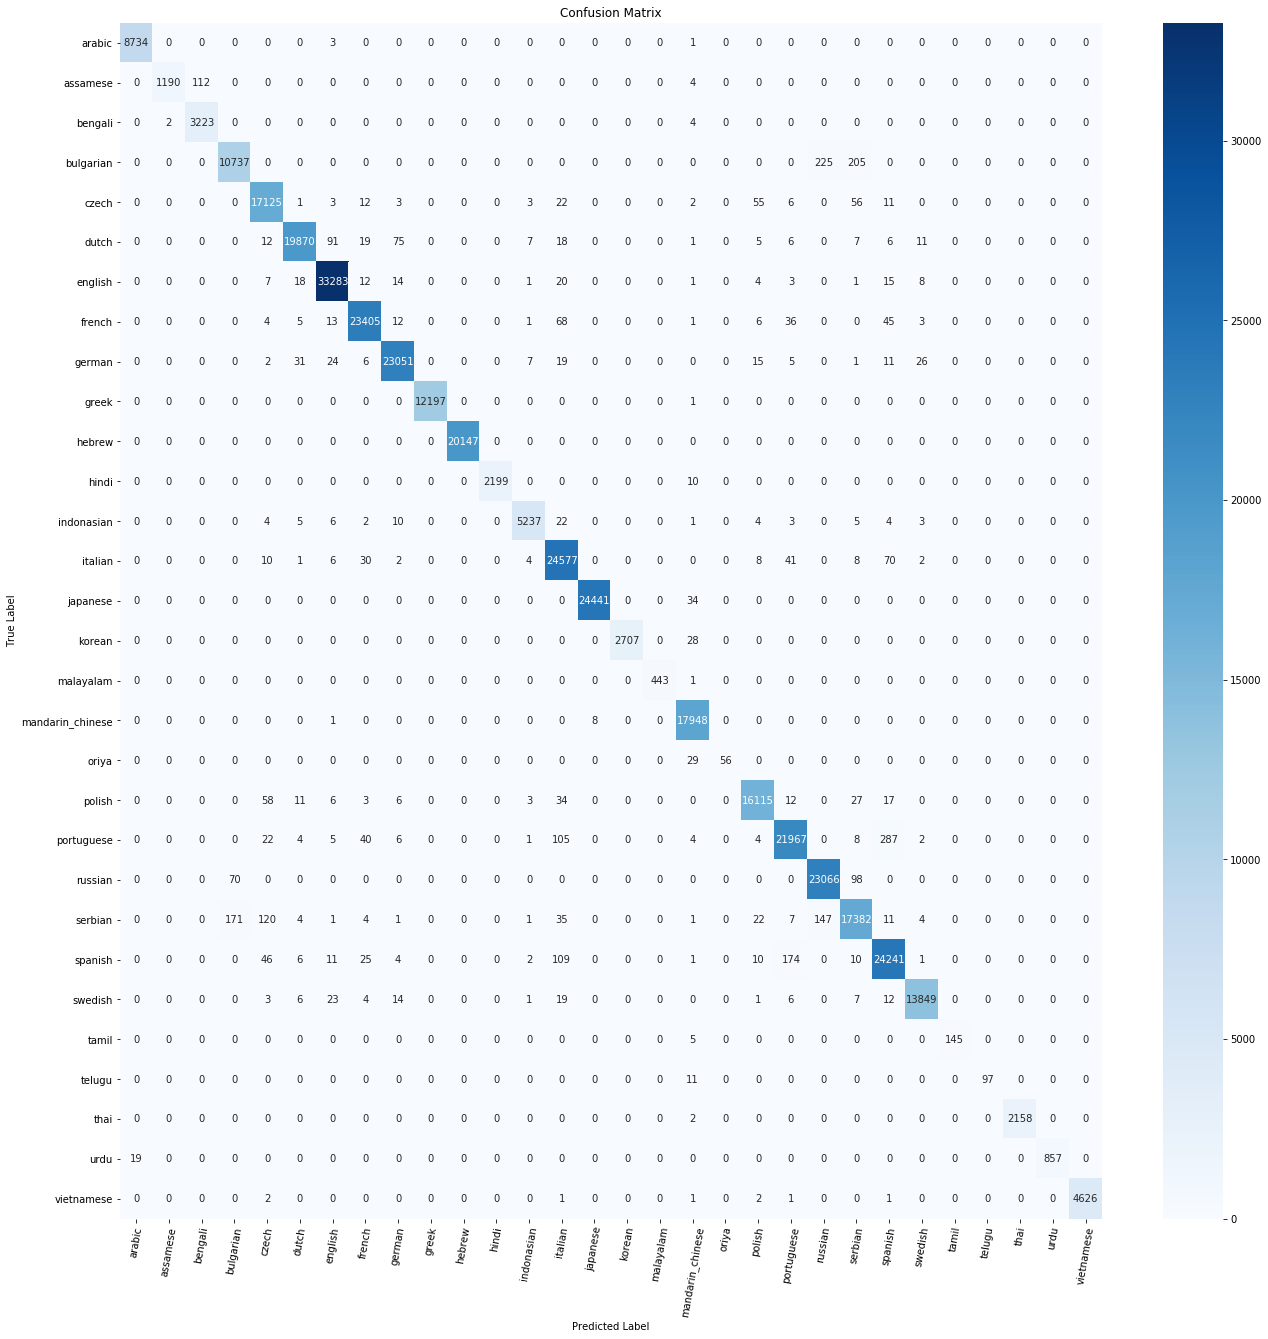

In [9]:
cm=metrics.confusion_matrix(Y_test,Y_predictedc4)
def plot_confusion_matrix(cm,fig_size=(22,22)):
    plt.figure(figsize=fig_size)
    plt.title('Confusion Matrix')
    sb.heatmap(cm,annot=True,fmt=".0f",xticklabels=languages, yticklabels=languages,cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=80)
    plt.show()
plot_confusion_matrix(cm)

## Saving Models

In [10]:
def save_pickle(data,filename):
    with bz2.BZ2File(filename+'.pbz2', 'w') as file:
        pickle.dump(data,file)
save_pickle(lr_1g_char,'lr_1g_char')
save_pickle(lr_1g_word,'lr_1g_word')
save_pickle(lr_2g_char,'lr_2g_char')
save_pickle(lr_2g_word,'lr_2g_word')
save_pickle(lr_3g_char,'lr_3g_char')
save_pickle(lr_4g_char,'lr_4g_char')

## Language Detector

In [11]:
def language_detector(text,filename='lr_4g_char'):
    import pickle
    table={33:'',34:'',35:'',36:'',37:'',38:'',39:'',40:'',41:'',42:'',43:'',44:'',45:'',46:'',47:'',58:'',59:'',60:'',61:'',62:'',63:'',64:'',91:'',92:'',93:'',94:'',95:'',96:'',123:'',124:'',125:'',126:'',48:'',49:'',50:'',51:'',52:'',53:'',54:'',55:'',56:'',57:''}
    LanguageDetectorModel=pickle.load(bz2.BZ2File(filename+'.pbz2','rb'))
    text=text.lower()
    text=text.translate(table)
    text=" ".join(text.split())
    predict=LanguageDetectorModel.predict([text])
    return (predict[0])

## Predictions

In [12]:
language_detector("His job is to 'overlook' the construction site and make sure everyone remains safe.")     # English

'english'

In [13]:
language_detector("Su trabajo es 'pasar por alto' el sitio de construcción y asegurarse de que todos permanezcan seguros.")     # Spanish

'spanish'

In [14]:
language_detector("Son travail consiste à surveiller le chantier et à s'assurer que tout le monde reste en sécurité.")     # French

'french'

In [15]:
language_detector("اس کا کام تعمیراتی سائٹ کو نظر انداز کرنا اور اس بات کو یقینی بنانا ہے کہ ہر کوئی محفوظ رہے۔")     # Urdu

'urdu'

In [16]:
language_detector("وظيفته هي التغاضي عن موقع البناء والتأكد من بقاء الجميع في أمان.")     # Arabic

'arabic'

In [17]:
language_detector("Η δουλειά του είναι να παραβλέψει το εργοτάξιο και να διασφαλίσει ότι όλοι παραμένουν ασφαλείς.")     # Greek

'greek'

In [18]:
language_detector("ତାଙ୍କର କାର୍ଯ୍ୟ ହେଉଛି ନିର୍ମାଣ ସ୍ଥାନକୁ ଅଣଦେଖା କରିବା ଏବଂ ସମସ୍ତେ ନିରାପଦରେ ରହିବା ନିଶ୍ଚିତ କରିବା |")     # Oriya

'oriya'

In [19]:
language_detector("그의 임무는 건설 현장을 간과하고 모든 사람이 안전하게 지낼 수 있도록하는 것입니다.")     # Korean

'korean'

In [20]:
language_detector("他的工作是忽略施工現場，並確保每個人都安全。")     # Chinese

'mandarin_chinese'

<i>All the Language in Predictions were correctly identified.</i>